<a href="https://colab.research.google.com/github/airxax/eu-gdp-2024/blob/main/EU_GDP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded Excel for plotting:
(35, 31)
Header row index:
4
Years used for plotting:
[np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), '...', np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Number of entities:
29


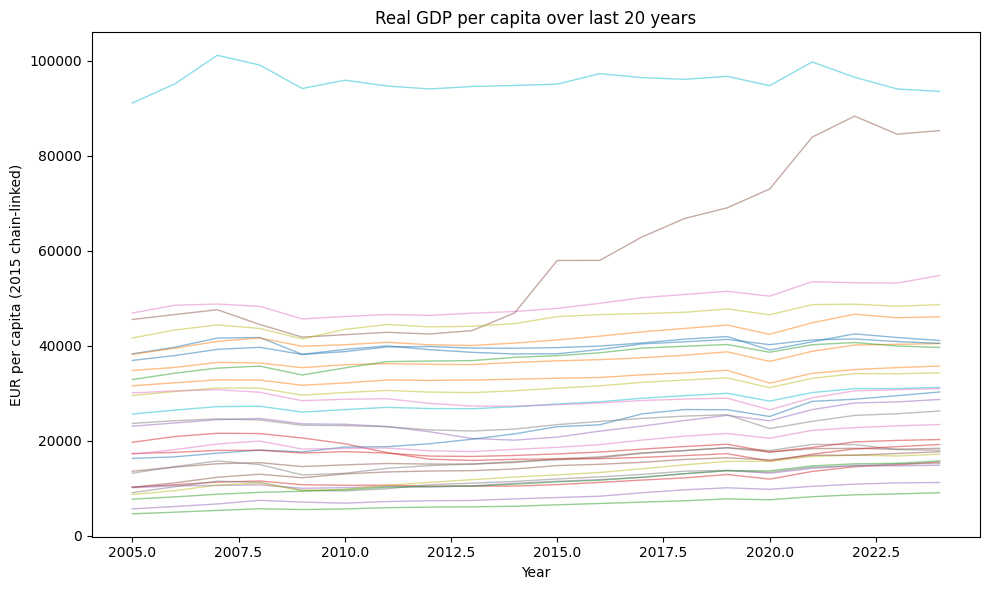

Displayed static multi-line plot
Saved interactive plot to gdp_all_countries_last20.html


In [9]:
# Plot GDP of all countries for the last 20 years (interactive and static)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Try plotly for an interactive chart
try:
    import plotly.express as px
    plotly_ok = True
except Exception as e:
    plotly_ok = False

if not plotly_ok:
    try:
        # Install plotly if not available
        print('Installing plotly...')
        import sys
        # Use pip magic in notebook
        import subprocess
        from IPython import get_ipython
        ipy = get_ipython()
        ipy.run_line_magic('pip', 'install plotly')
        import plotly.express as px
        plotly_ok = True
        print('Installed plotly')
    except Exception as e2:
        print('Plotly installation failed, will proceed with static matplotlib only')
        plotly_ok = False

# Load and parse
file_path = 'tipsna40_page_spreadsheet.xlsx'
df_raw = pd.read_excel(file_path, sheet_name=0, header=None)
print('Loaded Excel for plotting:')
print(df_raw.shape)

# Detect header row labeled TIME
header_row_idx = None
for idx in range(min(80, len(df_raw))):
    val = df_raw.iloc[idx, 0]
    if isinstance(val, str) and val.strip().upper() == 'TIME':
        header_row_idx = idx
        break
print('Header row index:')
print(header_row_idx)

work = df_raw.copy()
work.columns = work.iloc[header_row_idx]
work = work.iloc[header_row_idx + 1:].reset_index(drop=True)

# Rename TIME to Country
first_col_name = None
for c in work.columns:
    if isinstance(c, str) and c.strip().upper() == 'TIME':
        first_col_name = c
        break
if first_col_name is None:
    first_col_name = work.columns[0]
work = work.rename(columns={first_col_name: 'Country'})

# Clean rows
work['Country'] = work['Country'].astype(str).str.strip()
work = work[work['Country'].str.lower() != 'geo (labels)']
work = work[work['Country'] != '']

# Normalize year columns and coerce to numeric
year_cols_all = []
col_renames = {}
for c in work.columns:
    if c == 'Country':
        continue
    year_val = None
    try:
        year_val = int(float(c))
    except Exception:
        year_val = None
    if year_val is not None and 1900 <= year_val <= 2100:
        new_name = str(year_val)
        if new_name != c:
            col_renames[c] = new_name
        year_cols_all.append(new_name)

if len(col_renames) > 0:
    work = work.rename(columns=col_renames)

for y in year_cols_all:
    if y in work.columns:
        work[y] = pd.to_numeric(work[y], errors='coerce')

# Determine last 20 years
if len(year_cols_all) == 0:
    print('No year columns found')
else:
    years_int = sorted([int(y) for y in year_cols_all])
    max_year = years_int[-1]
    last_20 = [str(y) for y in range(max_year - 19, max_year + 1)]

    # Keep only last 20 years present
    keep_cols = ['Country'] + [y for y in last_20 if y in work.columns]
    df20 = work[keep_cols].copy()

    # Melt to long format
    long_df = df20.melt(id_vars='Country', var_name='Year', value_name='GDP').dropna(subset=['GDP'])
    long_df['Year'] = long_df['Year'].astype(int)

    # Report years actually used and number of countries
    years_used_sorted = sorted(long_df['Year'].unique())
    num_entities = long_df['Country'].nunique()
    print('Years used for plotting:')
    print(years_used_sorted[:5] + ['...'] + years_used_sorted[-5:] if len(years_used_sorted) > 10 else years_used_sorted)
    print('Number of entities:')
    print(num_entities)

    # Static quick plot (may be cluttered)
    plt.figure(figsize=(10, 6))
    for name, grp in long_df.groupby('Country'):
        grp_sorted = grp.sort_values('Year')
        plt.plot(grp_sorted['Year'], grp_sorted['GDP'], alpha=0.5, linewidth=1)
    plt.title('Real GDP per capita over last 20 years')
    plt.xlabel('Year')
    plt.ylabel('EUR per capita (2015 chain-linked)')
    plt.tight_layout()
    plt.show()
    print('Displayed static multi-line plot')

    # Interactive plotly chart saved to HTML
    if plotly_ok:
        fig = px.line(long_df, x='Year', y='GDP', color='Country', title='Real GDP per capita over last 20 years')
        # Save to HTML (self-contained)
        html_file = 'gdp_all_countries_last20.html'
        fig.write_html(html_file, include_plotlyjs='cdn', full_html=True)
        print('Saved interactive plot to ' + html_file)
    else:
        print('Interactive plot not available')

Loaded Excel with shape
(35, 31)
Found header row index
4
Found Greece row
Greece GDP per capita head
  Country  Year  GDP_per_capita
0  Greece  2000         16230.0
1  Greece  2001         16890.0
2  Greece  2002         17620.0
3  Greece  2003         18600.0
4  Greece  2004         19550.0


Plotting Greece: 100%|██████████| 1/1 [00:00<00:00, 43.86it/s]


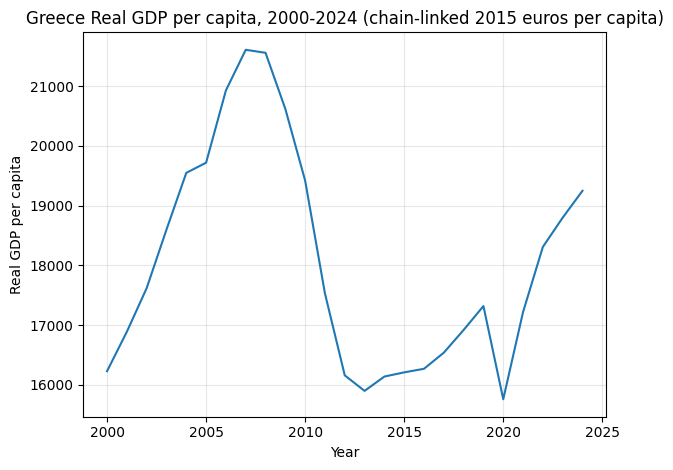

Displayed Greece line chart
Saved interactive chart to greece_real_gdp_per_capita_2000_2024.html


In [2]:
# This code filters the uploaded spreadsheet for Greece and plots Real GDP per capita (2000-2024). It also saves an interactive Plotly chart.

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Load the Excel file without assuming headers
file_path = 'tipsna40_page_spreadsheet.xlsx'

# Read as raw to identify header row
df_raw = pd.read_excel(file_path, sheet_name=0, header=None)
print('Loaded Excel with shape')
print(df_raw.shape)

# Find header row where first cell equals TIME
header_row_idx = None
for idx in range(min(50, len(df_raw))):
    cell = df_raw.iloc[idx, 0]
    if isinstance(cell, str) and cell.strip().upper() == 'TIME':
        header_row_idx = idx
        break

if header_row_idx is None:
    print('Could not find header row labeled TIME')
else:
    print('Found header row index')
    print(header_row_idx)

# Prepare a clean dataframe
if header_row_idx is not None:
    df = df_raw.copy()
    df.columns = df.iloc[header_row_idx]
    df = df.iloc[header_row_idx+1:].reset_index(drop=True)

    # Drop the informational row that starts with GEO (Labels)
    first_col_name = 'TIME' if 'TIME' in df.columns else df.columns[0]
    df = df.rename(columns={first_col_name: 'Country'})
    mask_info = df['Country'].astype(str).str.contains('GEO', case=False, na=False)
    df = df[~mask_info].copy()

    # Identify year columns 2000-2024 and standardize names to strings
    year_cols = []
    for col in df.columns:
        if col == 'Country':
            continue
        try:
            year_val = int(float(col))
            if 2000 <= year_val <= 2024:
                year_cols.append(col)
        except Exception:
            continue

    year_map = {}
    for col in year_cols:
        try:
            year_map[col] = str(int(float(col)))
        except Exception:
            year_map[col] = str(col)

    keep_cols = ['Country'] + year_cols
    df = df[keep_cols].rename(columns=year_map)

    # Coerce numeric values
    for c in [c for c in df.columns if c != 'Country']:
        df[c] = pd.to_numeric(df[c], errors='coerce')

    # Filter Greece row
    greece_row = df[df['Country'].astype(str).str.strip().str.lower() == 'greece'].copy()
    if greece_row.empty:
        print('Could not find Greece in Country column')
    else:
        print('Found Greece row')

        # Melt to long format
        df_long = greece_row.melt(id_vars='Country', var_name='Year', value_name='GDP_per_capita')
        df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
        df_long = df_long[(df_long['Year'] >= 2000) & (df_long['Year'] <= 2024)]
        df_long = df_long.sort_values('Year')

        # Show head
        print('Greece GDP per capita head')
        print(df_long.head())

        # Plot with matplotlib
        for _ in tqdm([1], desc='Plotting Greece'):
            plt.plot(df_long['Year'], df_long['GDP_per_capita'], color='tab:blue')
        plt.title('Greece Real GDP per capita, 2000-2024 (chain-linked 2015 euros per capita)')
        plt.xlabel('Year')
        plt.ylabel('Real GDP per capita')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print('Displayed Greece line chart')

        # Create interactive Plotly chart and save
        try:
            import plotly.express as px
        except Exception:
            print('Installing plotly')
            get_ipython().run_line_magic('pip', 'install plotly')
            import plotly.express as px

        fig = px.line(df_long, x='Year', y='GDP_per_capita', title='Greece Real GDP per capita, 2000-2024', markers=False)
        fig.update_layout(template='plotly_white', hovermode='x unified')
        out_file = 'greece_real_gdp_per_capita_2000_2024.html'
        fig.write_html(out_file, include_plotlyjs='cdn', full_html=True)
        print('Saved interactive chart to ' + out_file)
else:
    print('Header row not found so could not proceed')

Loaded Excel with shape
(35, 31)
Found header row index
4
Found Ireland row
Ireland GDP per capita with changes (head)
   Country  Year  GDP_per_capita  YoY_change  YoY_pct_change  \
0  Ireland  2000         38400.0         NaN             NaN   
1  Ireland  2001         39820.0      1420.0        3.697917   
2  Ireland  2002         41440.0      1620.0        4.068307   
3  Ireland  2003         41990.0       550.0        1.327220   
4  Ireland  2004         44070.0      2080.0        4.953560   

   Change_since_2000  Pct_change_since_2000  
0                0.0               0.000000  
1             1420.0               3.697917  
2             3040.0               7.916667  
3             3590.0               9.348958  
4             5670.0              14.765625  


Plotting change since 2000: 100%|██████████| 1/1 [00:00<00:00, 80.22it/s]


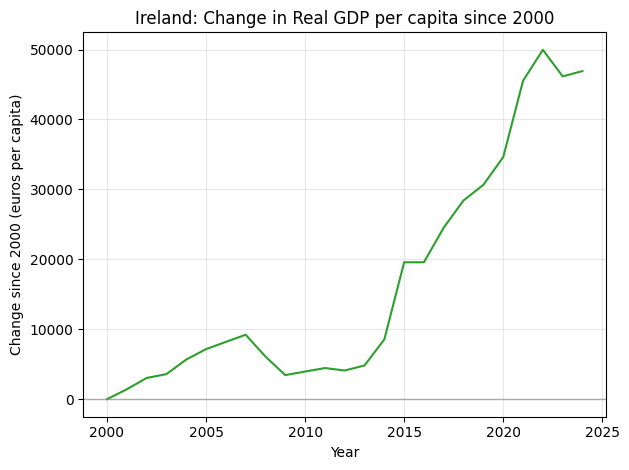

Displayed change since 2000 line chart


Plotting YoY change: 100%|██████████| 1/1 [00:00<00:00, 31.60it/s]


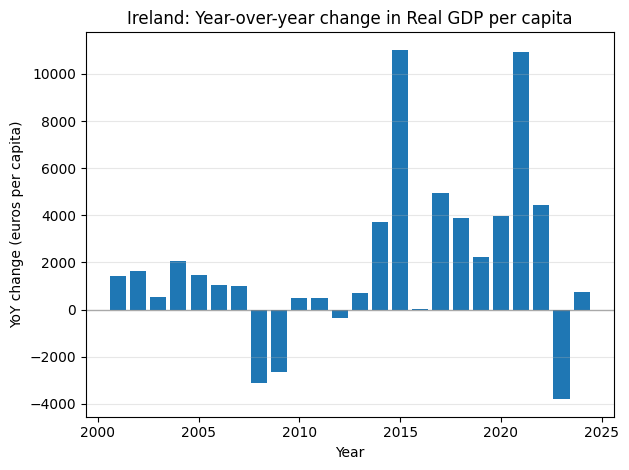

Displayed YoY change bar chart
Saved interactive chart to ireland_change_since_2000_real_gdp_per_capita_2000_2024.html
Saved interactive chart to ireland_yoy_change_real_gdp_per_capita_2000_2024.html


In [3]:
# This code extracts Ireland's Real GDP per capita (2000-2024) from the uploaded spreadsheet,
# computes changes (year-over-year and since-2000), plots them, and saves interactive charts.

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load the Excel raw (no header) and detect the header row
file_path = 'tipsna40_page_spreadsheet.xlsx'
df_raw = pd.read_excel(file_path, sheet_name=0, header=None)
print('Loaded Excel with shape')
print(df_raw.shape)

# Find header row where first cell equals TIME
header_row_idx = None
for idx in range(min(50, len(df_raw))):
    cell = df_raw.iloc[idx, 0]
    if isinstance(cell, str) and cell.strip().upper() == 'TIME':
        header_row_idx = idx
        break

if header_row_idx is None:
    print('Could not find header row labeled TIME')
else:
    print('Found header row index')
    print(header_row_idx)

# Prepare a clean dataframe
if header_row_idx is not None:
    df = df_raw.copy()
    df.columns = df.iloc[header_row_idx]
    df = df.iloc[header_row_idx+1:].reset_index(drop=True)

    # Rename first column to Country
    first_col_name = 'TIME' if 'TIME' in df.columns else df.columns[0]
    df = df.rename(columns={first_col_name: 'Country'})

    # Remove informational GEO row if present
    mask_info = df['Country'].astype(str).str.contains('GEO', case=False, na=False)
    df = df[~mask_info].copy()

    # Identify year columns 2000-2024
    year_cols = []
    for col in df.columns:
        if col == 'Country':
            continue
        try:
            year_val = int(float(col))
            if 2000 <= year_val <= 2024:
                year_cols.append(col)
        except Exception:
            continue

    # Normalize column names to string years
    year_map = {}
    for col in year_cols:
        try:
            year_map[col] = str(int(float(col)))
        except Exception:
            year_map[col] = str(col)

    keep_cols = ['Country'] + year_cols
    df = df[keep_cols].rename(columns=year_map)

    # Coerce numeric
    for c in [c for c in df.columns if c != 'Country']:
        df[c] = pd.to_numeric(df[c], errors='coerce')

    # Filter Ireland
    ireland_row = df[df['Country'].astype(str).str.strip().str.lower() == 'ireland'].copy()
    if ireland_row.empty:
        print('Could not find Ireland in Country column')
    else:
        print('Found Ireland row')

        # Long format
        df_long = ireland_row.melt(id_vars='Country', var_name='Year', value_name='GDP_per_capita')
        df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
        df_long = df_long[(df_long['Year'] >= 2000) & (df_long['Year'] <= 2024)]
        df_long = df_long.sort_values('Year')

        # Compute changes
        df_long['YoY_change'] = df_long['GDP_per_capita'].diff()
        df_long['YoY_pct_change'] = df_long['GDP_per_capita'].pct_change() * 100.0
        base_2000 = df_long.loc[df_long['Year'] == 2000, 'GDP_per_capita']
        base_2000_val = float(base_2000.iloc[0]) if len(base_2000) > 0 and pd.notnull(base_2000.iloc[0]) else np.nan
        df_long['Change_since_2000'] = df_long['GDP_per_capita'] - base_2000_val
        df_long['Pct_change_since_2000'] = (df_long['GDP_per_capita'] / base_2000_val - 1.0) * 100.0 if pd.notnull(base_2000_val) else np.nan

        # Show head of the change table
        print('Ireland GDP per capita with changes (head)')
        print(df_long.head())

        # Plot 1: Change since 2000 (absolute)
        for _ in tqdm([1], desc='Plotting change since 2000'):
            plt.plot(df_long['Year'], df_long['Change_since_2000'], color='tab:green')
        plt.axhline(0, color='gray', linewidth=1, alpha=0.6)
        plt.title('Ireland: Change in Real GDP per capita since 2000')
        plt.xlabel('Year')
        plt.ylabel('Change since 2000 (euros per capita)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print('Displayed change since 2000 line chart')

        # Plot 2: Year-over-year change (absolute)
        for _ in tqdm([1], desc='Plotting YoY change'):
            plt.bar(df_long['Year'], df_long['YoY_change'], color='tab:blue')
        plt.axhline(0, color='gray', linewidth=1, alpha=0.6)
        plt.title('Ireland: Year-over-year change in Real GDP per capita')
        plt.xlabel('Year')
        plt.ylabel('YoY change (euros per capita)')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        print('Displayed YoY change bar chart')

        # Save interactive charts
        try:
            import plotly.express as px
        except Exception:
            get_ipython().run_line_magic('pip', 'install plotly')
            import plotly.express as px

        # Interactive: change since 2000
        fig1 = px.line(df_long, x='Year', y='Change_since_2000', title='Ireland: Change in Real GDP per capita since 2000', markers=False)
        fig1.update_layout(template='plotly_white', hovermode='x unified')
        out_file1 = 'ireland_change_since_2000_real_gdp_per_capita_2000_2024.html'
        fig1.write_html(out_file1, include_plotlyjs='cdn', full_html=True)
        print('Saved interactive chart to ' + out_file1)

        # Interactive: YoY change
        fig2 = px.bar(df_long, x='Year', y='YoY_change', title='Ireland: YoY change in Real GDP per capita', labels={'YoY_change': 'YoY change (euros per capita)'})
        fig2.update_layout(template='plotly_white', hovermode='x unified')
        out_file2 = 'ireland_yoy_change_real_gdp_per_capita_2000_2024.html'
        fig2.write_html(out_file2, include_plotlyjs='cdn', full_html=True)
        print('Saved interactive chart to ' + out_file2)
else:
    print('Header row not found so could not proceed')

Loaded Excel for next 10:
(35, 31)
Header row index:
4
Next 10 table (ranks 11-20 by 2024):
4                                    Country  GDP_2024  \
0       Euro area – 20 countries (from 2023)   34340.0   
1  European Union - 27 countries (from 2020)   31280.0   
2                                      Italy   31010.0   
3                                      Malta   30310.0   
4                                     Cyprus   28730.0   
5                                      Spain   26300.0   
6                                   Slovenia   23470.0   
7                                   Portugal   20300.0   
8                                     Greece   19250.0   
9                                    Czechia   18450.0   

4  position_change_vs_2019  
0                        0  
1                        0  
2                        0  
3                        0  
4                        1  
5                       -1  
6                        0  
7                        0  
8       

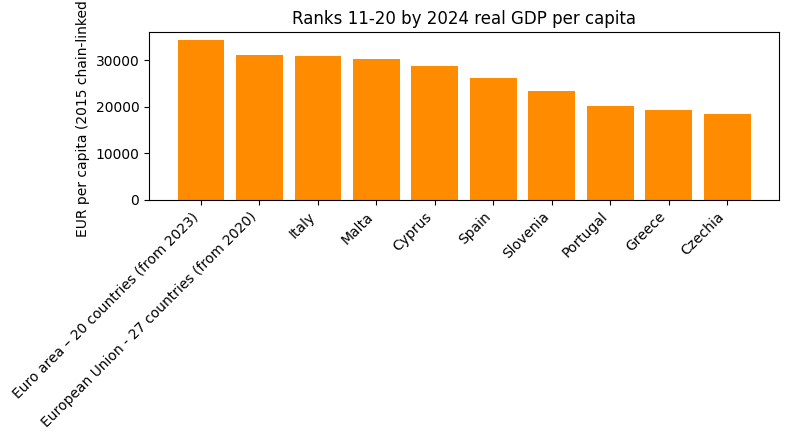

Displayed bar chart of ranks 11-20


In [6]:
# Compute ranks 11-20 by 2024 real GDP per capita with position change vs 2019 and plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and parse
file_path = 'tipsna40_page_spreadsheet.xlsx'
df_raw = pd.read_excel(file_path, sheet_name=0, header=None)
print('Loaded Excel for next 10:')
print(df_raw.shape)

# Detect header row labeled TIME
header_row_idx = None
for idx in range(min(80, len(df_raw))):
    val = df_raw.iloc[idx, 0]
    if isinstance(val, str) and val.strip().upper() == 'TIME':
        header_row_idx = idx
        break
print('Header row index:')
print(header_row_idx)

work = df_raw.copy()
work.columns = work.iloc[header_row_idx]
work = work.iloc[header_row_idx + 1:].reset_index(drop=True)

# Rename TIME to Country
first_col_name = None
for c in work.columns:
    if isinstance(c, str) and c.strip().upper() == 'TIME':
        first_col_name = c
        break
if first_col_name is None:
    first_col_name = work.columns[0]
work = work.rename(columns={first_col_name: 'Country'})

# Clean rows
work['Country'] = work['Country'].astype(str).str.strip()
work = work[work['Country'].str.lower() != 'geo (labels)']
work = work[work['Country'] != '']

# Normalize year columns and coerce
col_renames = {}
year_cols = []
for c in work.columns:
    if c == 'Country':
        continue
    year_val = None
    try:
        year_val = int(float(c))
    except Exception:
        year_val = None
    if year_val is not None and 1900 <= year_val <= 2100:
        new_name = str(year_val)
        if new_name != c:
            col_renames[c] = new_name
        year_cols.append(new_name)

if len(col_renames) > 0:
    work = work.rename(columns=col_renames)

for y in year_cols:
    if y in work.columns:
        work[y] = pd.to_numeric(work[y], errors='coerce')

for y in ['2019', '2024']:
    if y not in work.columns:
        work[y] = np.nan

sub = work[['Country', '2019', '2024']].copy()
sub = sub.dropna(subset=['2019', '2024'])

# Ranks and position change
sub['rank_2019'] = sub['2019'].rank(ascending=False, method='min').astype(int)
sub['rank_2024'] = sub['2024'].rank(ascending=False, method='min').astype(int)
sub['position_change_vs_2019'] = sub['rank_2019'] - sub['rank_2024']

# Sort all by 2024 descending and take positions 11-20 (0-indexed 10:20)
sorted_all = sub.sort_values('2024', ascending=False).reset_index(drop=True)
next10 = sorted_all.iloc[10:20].copy()
result_next10 = next10[['Country', '2024', 'position_change_vs_2019']].rename(columns={'2024': 'GDP_2024'})
result_next10 = result_next10.reset_index(drop=True)

print('Next 10 table (ranks 11-20 by 2024):')
print(result_next10)

# Save CSV
out_csv = 'next10_richest_2024_with_position_change.csv'
result_next10.to_csv(out_csv, index=False)
print('Saved table to ' + out_csv)

# Bar chart of GDP_2024 for next 10
plt.figure(figsize=(8, 4.5))
plt.bar(result_next10['Country'], result_next10['GDP_2024'], color='darkorange')
plt.title('Ranks 11-20 by 2024 real GDP per capita')
plt.ylabel('EUR per capita (2015 chain-linked)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print('Displayed bar chart of ranks 11-20')

Loaded Excel for remaining:
(35, 31)
Header row index:
4
Remaining countries table (ranks 21+ by 2024):
4    Country  GDP_2024  position_change_vs_2019
0    Estonia   18030.0                       -2
1   Slovakia   17720.0                        0
2  Lithuania   17210.0                        0
3     Poland   15800.0                        2
4    Croatia   15580.0                        2
5     Latvia   15290.0                       -2
6    Hungary   14890.0                       -2
7    Romania   11260.0                        0
8   Bulgaria    9110.0                        0
Saved table to remaining_richest_2024_with_position_change.csv


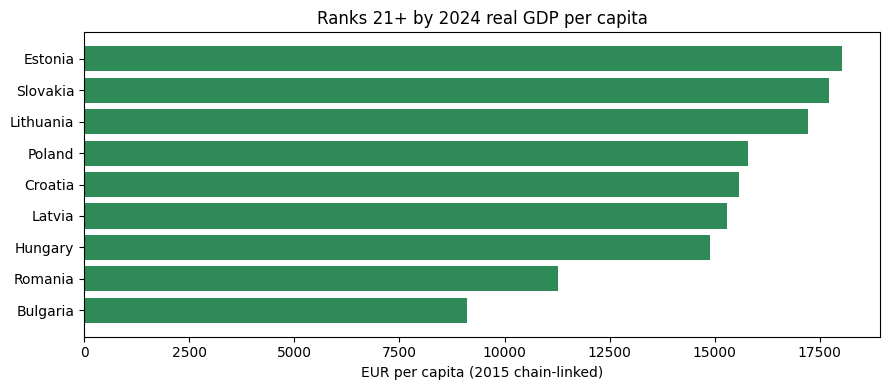

Displayed bar chart of remaining ranks


In [7]:
# Compute remaining countries (ranks 21 onward) by 2024 real GDP per capita with position change vs 2019 and plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and parse
file_path = 'tipsna40_page_spreadsheet.xlsx'
df_raw = pd.read_excel(file_path, sheet_name=0, header=None)
print('Loaded Excel for remaining:')
print(df_raw.shape)

# Detect header row labeled TIME
header_row_idx = None
for idx in range(min(80, len(df_raw))):
    val = df_raw.iloc[idx, 0]
    if isinstance(val, str) and val.strip().upper() == 'TIME':
        header_row_idx = idx
        break
print('Header row index:')
print(header_row_idx)

work = df_raw.copy()
work.columns = work.iloc[header_row_idx]
work = work.iloc[header_row_idx + 1:].reset_index(drop=True)

# Rename TIME to Country
first_col_name = None
for c in work.columns:
    if isinstance(c, str) and c.strip().upper() == 'TIME':
        first_col_name = c
        break
if first_col_name is None:
    first_col_name = work.columns[0]
work = work.rename(columns={first_col_name: 'Country'})

# Clean rows
work['Country'] = work['Country'].astype(str).str.strip()
work = work[work['Country'].str.lower() != 'geo (labels)']
work = work[work['Country'] != '']

# Normalize year columns and coerce
col_renames = {}
year_cols = []
for c in work.columns:
    if c == 'Country':
        continue
    year_val = None
    try:
        year_val = int(float(c))
    except Exception:
        year_val = None
    if year_val is not None and 1900 <= year_val <= 2100:
        new_name = str(year_val)
        if new_name != c:
            col_renames[c] = new_name
        year_cols.append(new_name)

if len(col_renames) > 0:
    work = work.rename(columns=col_renames)

for y in year_cols:
    if y in work.columns:
        work[y] = pd.to_numeric(work[y], errors='coerce')

for y in ['2019', '2024']:
    if y not in work.columns:
        work[y] = np.nan

sub = work[['Country', '2019', '2024']].copy()
sub = sub.dropna(subset=['2019', '2024'])

# Ranks and position change
sub['rank_2019'] = sub['2019'].rank(ascending=False, method='min').astype(int)
sub['rank_2024'] = sub['2024'].rank(ascending=False, method='min').astype(int)
sub['position_change_vs_2019'] = sub['rank_2019'] - sub['rank_2024']

# Sorted by 2024 descending
sorted_all = sub.sort_values('2024', ascending=False).reset_index(drop=True)
remaining = sorted_all.iloc[20:].copy()
result_remaining = remaining[['Country', '2024', 'position_change_vs_2019']].rename(columns={'2024': 'GDP_2024'})
result_remaining = result_remaining.reset_index(drop=True)

print('Remaining countries table (ranks 21+ by 2024):')
print(result_remaining)

# Save CSV
out_csv = 'remaining_richest_2024_with_position_change.csv'
result_remaining.to_csv(out_csv, index=False)
print('Saved table to ' + out_csv)

# Plot: horizontal bar chart for readability
plt.figure(figsize=(9, max(4, 0.35 * len(result_remaining))))
plt.barh(result_remaining['Country'], result_remaining['GDP_2024'], color='seagreen')
plt.title('Ranks 21+ by 2024 real GDP per capita')
plt.xlabel('EUR per capita (2015 chain-linked)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print('Displayed bar chart of remaining ranks')

Loaded Excel for YoY calc:
(35, 31)
Header row index:
4
Years considered (last 6 for 5 YoY periods):
['2019', '2020', '2021', '2022', '2023', '2024']


Computing YoY averages: 100%|██████████| 29/29 [00:00<00:00, 5130.76it/s]

Top of ranking (head):
                                 Country  Avg_YoY_Positive_Change_Percent  \
0                                Estonia                             7.06   
1                                Croatia                             6.89   
2                                Ireland                             6.71   
3                             Luxembourg                             5.27   
4                                 Greece                             5.17   
5                                  Malta                             4.87   
6                               Bulgaria                             4.59   
7                                Denmark                             4.52   
8                                 Cyprus                             4.40   
9                                Hungary                             4.34   
10                               Austria                             4.25   
11                                 Italy             

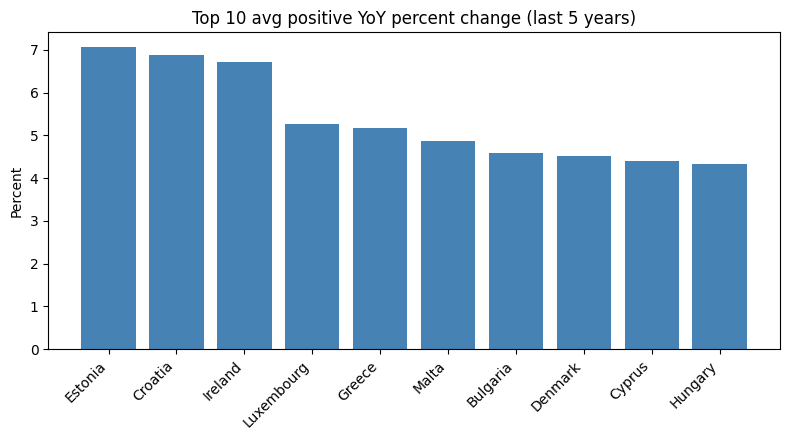

Displayed bar chart for top 10


In [8]:
# Calculate average positive YoY percent change over the last 5 years for each country and rank

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load and parse
file_path = 'tipsna40_page_spreadsheet.xlsx'
df_raw = pd.read_excel(file_path, sheet_name=0, header=None)
print('Loaded Excel for YoY calc:')
print(df_raw.shape)

# Detect header row labeled TIME
header_row_idx = None
for idx in range(min(80, len(df_raw))):
    val = df_raw.iloc[idx, 0]
    if isinstance(val, str) and val.strip().upper() == 'TIME':
        header_row_idx = idx
        break
print('Header row index:')
print(header_row_idx)

work_df = df_raw.copy()
work_df.columns = work_df.iloc[header_row_idx]
work_df = work_df.iloc[header_row_idx + 1:].reset_index(drop=True)

# Rename TIME to Country
first_col_name = None
for c in work_df.columns:
    if isinstance(c, str) and c.strip().upper() == 'TIME':
        first_col_name = c
        break
if first_col_name is None:
    first_col_name = work_df.columns[0]
work_df = work_df.rename(columns={first_col_name: 'Country'})

# Clean rows
work_df['Country'] = work_df['Country'].astype(str).str.strip()
work_df = work_df[work_df['Country'].str.lower() != 'geo (labels)']
work_df = work_df[work_df['Country'] != '']

# Normalize year columns and coerce to numeric
col_renames = {}
year_cols_all = []
for c in work_df.columns:
    if c == 'Country':
        continue
    year_val = None
    try:
        year_val = int(float(c))
    except Exception:
        year_val = None
    if year_val is not None and 1900 <= year_val <= 2100:
        new_name = str(year_val)
        if new_name != c:
            col_renames[c] = new_name
        year_cols_all.append(new_name)

if len(col_renames) > 0:
    work_df = work_df.rename(columns=col_renames)

# Ensure numeric
for y in year_cols_all:
    if y in work_df.columns:
        work_df[y] = pd.to_numeric(work_df[y], errors='coerce')

# Identify the last 6 consecutive years available overall, anchored at the max year present
num_periods = 5
needed_years = []
if len(year_cols_all) > 0:
    years_int = sorted([int(y) for y in year_cols_all])
    max_year = years_int[-1]
    # Build last 6 years list: max_year-5 to max_year
    last_years = [str(y) for y in range(max_year - num_periods, max_year + 1)]
    needed_years = last_years
else:
    needed_years = []

print('Years considered (last 6 for 5 YoY periods):')
print(needed_years)

# Keep only needed columns if they exist
cols_keep = ['Country'] + [y for y in needed_years if y in work_df.columns]
sub_df = work_df[cols_keep].copy()

# Function to compute average positive YoY percent change for the last 5 years
results = []
for i in tqdm(range(len(sub_df)), desc='Computing YoY averages'):
    row = sub_df.iloc[i]
    country = row['Country']
    values = []
    years_present = []
    for y in needed_years:
        if y in sub_df.columns:
            values.append(row.get(y))
            years_present.append(y)
    # Compute YoY percent change across consecutive present years
    pos_changes = []
    for j in range(1, len(values)):
        prev = values[j-1]
        curr = values[j]
        if pd.notna(prev) and pd.notna(curr) and prev != 0:
            pct = (curr - prev) / prev
            if pct > 0:
                pos_changes.append(pct)
    avg_pos_yoy = np.nan
    if len(pos_changes) > 0:
        avg_pos_yoy = float(np.mean(pos_changes))
    results.append({
        'Country': country,
        'avg_positive_yoy_pct_last5': avg_pos_yoy,
        'num_positive_years_used': len(pos_changes)
    })

res_df = pd.DataFrame(results)
# Drop rows with NaN averages (no positive years)
res_df = res_df.dropna(subset=['avg_positive_yoy_pct_last5'])
# Rank descending by average positive YoY
res_df = res_df.sort_values('avg_positive_yoy_pct_last5', ascending=False).reset_index(drop=True)

# Create a nice percentage column
res_df['avg_positive_yoy_pct_last5_pct'] = (res_df['avg_positive_yoy_pct_last5'] * 100.0).round(2)

# Output table with rank
res_out = res_df[['Country', 'avg_positive_yoy_pct_last5_pct', 'num_positive_years_used']].rename(columns={'avg_positive_yoy_pct_last5_pct': 'Avg_YoY_Positive_Change_Percent', 'num_positive_years_used': 'Count_Positive_Years'})

print('Top of ranking (head):')
print(res_out.head(20))

# Save full ranking
out_csv = 'avg_positive_yoy_last5_ranking.csv'
res_out.to_csv(out_csv, index=False)
print('Saved full ranking to ' + out_csv)

# Quick visualization: top 10 bar chart
top10 = res_out.head(10)
plt.figure(figsize=(8, 4.5))
plt.bar(top10['Country'], top10['Avg_YoY_Positive_Change_Percent'], color='steelblue')
plt.title('Top 10 avg positive YoY percent change (last 5 years)')
plt.ylabel('Percent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print('Displayed bar chart for top 10')